In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
import warnings 
warnings.filterwarnings('ignore')

In [31]:
#Load Data set and browser first five rows as sample to see how dataset look like.
df = pd.read_csv('data_file.csv')
df.head()

Unnamed: 0  label       msisdn    aon  daily_decr30  daily_decr90  \
0           1      0  21408I70789  272.0   3055.050000   3065.150000   
1           2      1  76462I70374  712.0  12122.000000  12124.750000   
2           3      1  17943I70372  535.0   1398.000000   1398.000000   
3           4      1  55773I70781  241.0     21.228000     21.228000   
4           5      1  03813I82730  947.0    150.619333    150.619333   

   rental30  rental90  last_rech_date_ma  last_rech_date_da  ...  \
0    220.13    260.13                2.0                0.0  ...   
1   3691.26   3691.26               20.0                0.0  ...   
2    900.13    900.13                3.0                0.0  ...   
3    159.42    159.42               41.0                0.0  ...   
4   1098.90   1098.90                4.0                0.0  ...   

   maxamnt_loans30  medianamnt_loans30  cnt_loans90  amnt_loans90  \
0              6.0                 0.0          2.0            12   
1             12.0                 0.0          1.0            12   
2              6.0                 0.0          1.0             6   
3              6.0                 0.0          2.0            12   
4              6.0                 0.0          7.0            42   

   maxamnt_loans90  medianamnt_loans90  payback30  payback90  pcircle  \
0                6                 0.0  29.000000  29.000000      UPW   
1               12                 0.0   0.000000   0.000000      UPW   
2                6                 0.0   0.000000   0.000000      UPW   
3                6                 0.0   0.000000   0.000000      UPW   
4                6                 0.0   2.333333   2.333333      UPW   

        pdate  
0  2016-07-20  
1  2016-08-10  
2  2016-08-19  
3  2016-06-06  
4  2016-06-22  

[5 rows x 37 columns]

#### Obsarvation:-
Data contain extra index column which will be removed, MSISDN,pdate and pcircle column will also be removed as they are not going to help

In [32]:
df=df.iloc[:,1:-2]

In [33]:
df.head()

label       msisdn    aon  daily_decr30  daily_decr90  rental30  rental90  \
0      0  21408I70789  272.0   3055.050000   3065.150000    220.13    260.13   
1      1  76462I70374  712.0  12122.000000  12124.750000   3691.26   3691.26   
2      1  17943I70372  535.0   1398.000000   1398.000000    900.13    900.13   
3      1  55773I70781  241.0     21.228000     21.228000    159.42    159.42   
4      1  03813I82730  947.0    150.619333    150.619333   1098.90   1098.90   

   last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  ...  cnt_loans30  \
0                2.0                0.0              1539  ...            2   
1               20.0                0.0              5787  ...            1   
2                3.0                0.0              1539  ...            1   
3               41.0                0.0               947  ...            2   
4                4.0                0.0              2309  ...            7   

   amnt_loans30  maxamnt_loans30  medianamnt_loans30  cnt_loans90  \
0            12              6.0                 0.0          2.0   
1            12             12.0                 0.0          1.0   
2             6              6.0                 0.0          1.0   
3            12              6.0                 0.0          2.0   
4            42              6.0                 0.0          7.0   

   amnt_loans90  maxamnt_loans90  medianamnt_loans90  payback30  payback90  
0            12                6                 0.0  29.000000  29.000000  
1            12               12                 0.0   0.000000   0.000000  
2             6                6                 0.0   0.000000   0.000000  
3            12                6                 0.0   0.000000   0.000000  
4            42                6                 0.0   2.333333   2.333333  

[5 rows x 34 columns]

In [34]:
#To display all row while discribing the dataset, by default describe display only first 5 and last 5 rows in output
pd.set_option('display.max_row',None)

In [35]:
df.shape  #Display shape of data we are going to use, in curent dataset there are 207 row and 61 columns

(209593, 34)

In [36]:
#if we don't set pd.set_option('display.max_row',None), dtypes will return first 5 and last 5 rows only.
df.dtypes

label                     int64
msisdn                   object
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_loans90           int64
medianam

#### Obsarvation:-

Maximum number are uniqe, we can drop these number.

#### Obsarvation: 
Maximum values are unique in this column, also it is not a numeric value.

In [38]:
df['msisdn'].value_counts()

04581I85330    7
47819I90840    7
30080I90588    6
43430I70786    6
22038I88658    6
29191I82738    6
43096I88688    6
42825I88688    6
87592I84456    6
67324I84453    6
60744I91197    6
55809I89238    6
94119I84456    6
71742I90843    6
46895I84453    5
99721I85329    5
24906I70786    5
82675I84450    5
12125I88650    5
36494I85338    5
60476I84451    5
07747I90581    5
51545I85329    5
63085I90845    5
97649I82731    5
10002I88658    5
25840I70786    5
34525I90581    5
61951I88658    5
10535I90844    5
43945I84452    5
12582I89235    5
01394I90843    5
54218I70377    5
45099I84456    5
87267I70787    5
34362I70785    5
91642I84457    5
88892I70372    5
12730I89231    5
80215I90584    5
62379I70789    5
62344I85349    5
46484I84453    5
76939I82731    5
37897I89236    5
21926I88659    5
02304I95201    5
78109I96341    5
01339I70375    5
87521I70788    5
56681I88649    5
27674I84457    5
67334I90583    5
10996I70787    5
04404I88690    5
78160I89231    5
62395I89230    5
93190I93191   

In [39]:
df=df.drop(["msisdn","aon"],axis=1)
df.head()

label  daily_decr30  daily_decr90  rental30  rental90  last_rech_date_ma  \
0      0   3055.050000   3065.150000    220.13    260.13                2.0   
1      1  12122.000000  12124.750000   3691.26   3691.26               20.0   
2      1   1398.000000   1398.000000    900.13    900.13                3.0   
3      1     21.228000     21.228000    159.42    159.42               41.0   
4      1    150.619333    150.619333   1098.90   1098.90                4.0   

   last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  fr_ma_rech30  ...  \
0                0.0              1539              2          21.0  ...   
1                0.0              5787              1           0.0  ...   
2                0.0              1539              1           0.0  ...   
3                0.0               947              0           0.0  ...   
4                0.0              2309              7           2.0  ...   

   cnt_loans30  amnt_loans30  maxamnt_loans30  medianamnt_loans30  \
0            2            12              6.0                 0.0   
1            1            12             12.0                 0.0   
2            1             6              6.0                 0.0   
3            2            12              6.0                 0.0   
4            7            42              6.0                 0.0   

   cnt_loans90  amnt_loans90  maxamnt_loans90  medianamnt_loans90  payback30  \
0          2.0            12                6                 0.0  29.000000   
1          1.0            12               12                 0.0   0.000000   
2          1.0             6                6                 0.0   0.000000   
3          2.0            12                6                 0.0   0.000000   
4          7.0            42                6                 0.0   2.333333   

   payback90  
0  29.000000  
1   0.000000  
2   0.000000  
3   0.000000  
4   2.333333  

[5 rows x 32 columns]

In [40]:
df.shape

(209593, 32)

In [41]:
df.describe()

label   daily_decr30   daily_decr90       rental30  \
count  209593.000000  209593.000000  209593.000000  209593.000000   
mean        0.875177    5381.402289    6082.515068    2692.581910   
std         0.330519    9220.623400   10918.812767    4308.586781   
min         0.000000     -93.012667     -93.012667  -23737.140000   
25%         1.000000      42.440000      42.692000     280.420000   
50%         1.000000    1469.175667    1500.000000    1083.570000   
75%         1.000000    7244.000000    7802.790000    3356.940000   
max         1.000000  265926.000000  320630.000000  198926.110000   

            rental90  last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  \
count  209593.000000      209593.000000      209593.000000     209593.000000   
mean     3483.406534        3755.847800        3712.202921       2064.452797   
std      5770.461279       53905.892230       53374.833430       2370.786034   
min    -24720.580000         -29.000000         -29.000000          0.000000   
25%       300.260000           1.000000           0.000000        770.000000   
50%      1334.000000           3.000000           0.000000       1539.000000   
75%      4201.790000           7.000000           0.000000       2309.000000   
max    200148.110000      998650.377733      999171.809410      55000.000000   

       cnt_ma_rech30   fr_ma_rech30  ...    cnt_loans30   amnt_loans30  \
count  209593.000000  209593.000000  ...  209593.000000  209593.000000   
mean        3.978057    3737.355121  ...       2.758981      17.952021   
std         4.256090   53643.625172  ...       2.554502      17.379741   
min         0.000000       0.000000  ...       0.000000       0.000000   
25%         1.000000       0.000000  ...       1.000000       6.000000   
50%         3.000000       2.000000  ...       2.000000      12.000000   
75%         5.000000       6.000000  ...       4.000000      24.000000   
max       203.000000  999606.368132  ...      50.000000     306.000000   

       maxamnt_loans30  medianamnt_loans30    cnt_loans90   amnt_loans90  \
count    209593.000000       209593.000000  209593.000000  209593.000000   
mean        274.658747            0.054029      18.520919      23.645398   
std        4245.264648            0.218039     224.797423      26.469861   
min           0.000000            0.000000       0.000000       0.000000   
25%           6.000000            0.000000       1.000000       6.000000   
50%           6.000000            0.000000       2.000000      12.000000   
75%           6.000000            0.000000       5.000000      30.000000   
max       99864.560864            3.000000    4997.517944     438.000000   

       maxamnt_loans90  medianamnt_loans90      payback30      payback90  
count    209593.000000       209593.000000  209593.000000  209593.000000  
mean          6.703134            0.046077       3.398826       4.321485  
std           2.103864            0.200692       8.813729      10.308108  
min           0.000000            0.000000       0.000000       0.000000  
25%           6.000000            0.000000       0.000000       0.000000  
50%           6.000000            0.000000       0.000000       1.666667  
75%           6.000000            0.000000       3.750000       4.500000  
max          12.000000            3.000000     171.500000     171.500000  

[8 rows x 32 columns]

### Obsarvation:-

1. Count in all column are same, it indicate that there is no null value exist in this data set.
2. Huge difference in means and Max value for multiple columns, it indicate that outlier exist in this data set, which we will handle in next steps.
3. Mean and 50%(Medien ) has huge difference , it indicate that columns data is skewed.



In [42]:
df.isnull().sum()

label                   0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
dtype: int64

#### No Null value present

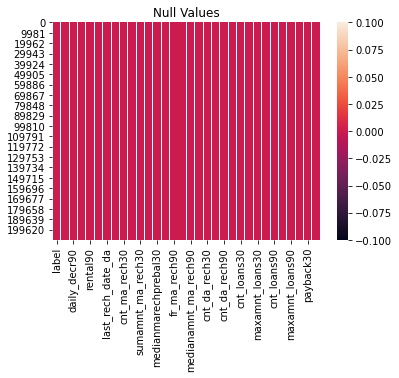

In [43]:
import matplotlib.pyplot as plt
plt.figure()
sns.heatmap(df.isnull())
plt.title("Null Values")
plt.show()

#### No Null Value in this dataset

<AxesSubplot:xlabel='label', ylabel='count'>

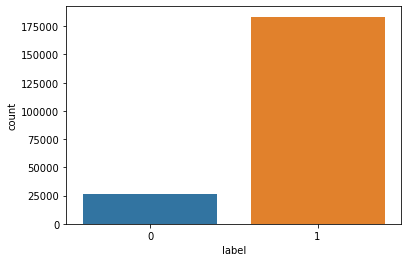

In [44]:
sns.countplot(df['label'])

### Obsarvation:-
Data is immbalanced 

<AxesSubplot:xlabel='cnt_loans30', ylabel='count'>

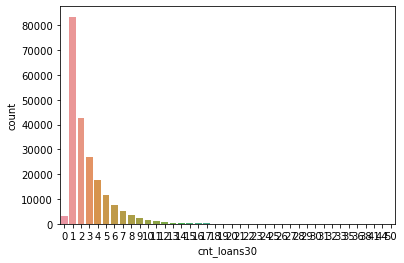

In [45]:
sns.countplot(df['cnt_loans30'])

In [ ]:
#sns.set_theme(style="whitegrid")
#sns.catplot('maxamnt_loans30','maxamnt_loans90',hue='label',data=df)

<AxesSubplot:title={'center':'Comparision between recharge amount and loan amount in 30 days'}, xlabel='maxamnt_loans90', ylabel='amnt_loans30'>

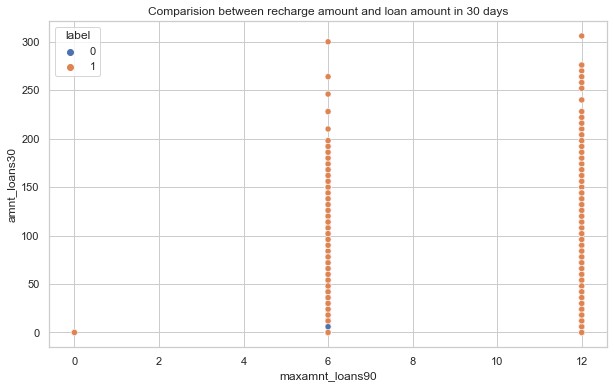

In [53]:
plt.figure(figsize=[10,6])
plt.title("Comparision between recharge amount and loan amount in 30 days")
sns.scatterplot(df['maxamnt_loans90'],df['amnt_loans30'],hue=df['label'])

### Data is imbalanced  exist, Defaulter customer are less then Non-Defaulter customer, have to check other parameters like F1 score precision to make sure that model is performing well.

In [23]:
#check corrilation 

corr_mat = df1.corr()

In [24]:
corr_mat

label  daily_decr30  daily_decr90  rental30  \
label                 1.000000      0.168298      0.166150  0.058085   
daily_decr30          0.168298      1.000000      0.977704  0.442066   
daily_decr90          0.166150      0.977704      1.000000  0.434685   
rental30              0.058085      0.442066      0.434685  1.000000   
rental90              0.075521      0.458977      0.471730  0.955237   
last_rech_date_ma     0.003728      0.000487      0.000908 -0.001095   
last_rech_date_da     0.001711     -0.001636     -0.001886  0.003261   
last_rech_amt_ma      0.131804      0.275837      0.264131  0.127271   
cnt_ma_rech30         0.237331      0.451385      0.426707  0.233343   
fr_ma_rech30          0.001330     -0.000577     -0.000343 -0.001219   
sumamnt_ma_rech30     0.202828      0.636536      0.603886  0.272649   
medianamnt_ma_rech30  0.141490      0.295356      0.282960  0.129853   
medianmarechprebal30 -0.004829     -0.001153     -0.000746 -0.001415   
cnt_ma_rech90         0.236392      0.587338      0.593069  0.312118   
fr_ma_rech90          0.084385     -0.078299     -0.079530 -0.033530   
sumamnt_ma_rech90     0.205793      0.762981      0.768817  0.342306   
medianamnt_ma_rech90  0.120855      0.257847      0.250518  0.110356   
medianmarechprebal90  0.039300      0.037495      0.036382  0.027170   
cnt_da_rech30         0.003827      0.000700      0.000661 -0.001105   
fr_da_rech30         -0.000027     -0.001499     -0.001570 -0.002558   
cnt_da_rech90         0.002999      0.038814      0.031155  0.072255   
fr_da_rech90         -0.005418      0.020673      0.016437  0.046761   
cnt_loans30           0.196283      0.366116      0.340387  0.180203   
amnt_loans30          0.197272      0.471492      0.447869  0.233453   
maxamnt_loans30       0.000248     -0.000028      0.000025 -0.000864   
medianamnt_loans30    0.044589     -0.011610     -0.005591 -0.016482   
cnt_loans90           0.004733      0.008962      0.009446  0.004012   
amnt_loans90          0.199788      0.563496      0.567204  0.298943   
maxamnt_loans90       0.084144      0.400199      0.397251  0.234211   
medianamnt_loans90    0.035747     -0.037305     -0.034686 -0.035489   
payback30             0.048336      0.026915      0.019400  0.072974   
payback90             0.049183      0.047175      0.040800  0.095147   

                      rental90  last_rech_date_ma  last_rech_date_da  \
label                 0.075521           0.003728           0.001711   
daily_decr30          0.458977           0.000487          -0.001636   
daily_decr90          0.471730           0.000908          -0.001886   
rental30              0.955237          -0.001095           0.003261   
rental90              1.000000          -0.001688           0.002794   
last_rech_date_ma    -0.001688           1.000000           0.001790   
last_rech_date_da     0.002794           0.001790           1.000000   
last_rech_amt_ma      0.121416          -0.000147          -0.000149   
cnt_ma_rech30         0.230260           0.004311           0.001549   
fr_ma_rech30         -0.000503          -0.001629           0.001158   
sumamnt_ma_rech30     0.259709           0.002105           0.000046   
medianamnt_ma_rech30  0.120242          -0.001358           0.001037   
medianmarechprebal30 -0.001237           0.004071           0.002849   
cnt_ma_rech90         0.345293           0.004263           0.001272   
fr_ma_rech90         -0.036524           0.001414           0.000798   
sumamnt_ma_rech90     0.360601           0.002243          -0.000414   
medianamnt_ma_rech90  0.103151          -0.000726           0.000219   
medianmarechprebal90  0.029547          -0.001086           0.004158   
cnt_da_rech30        -0.000548          -0.003467          -0.003628   
fr_da_rech30         -0.002345          -0.003626          -0.000074   
cnt_da_rech90         0.056282          -0.003538          -0.001859   
fr_da_rech90          0.036886          -0.002395          -0.00

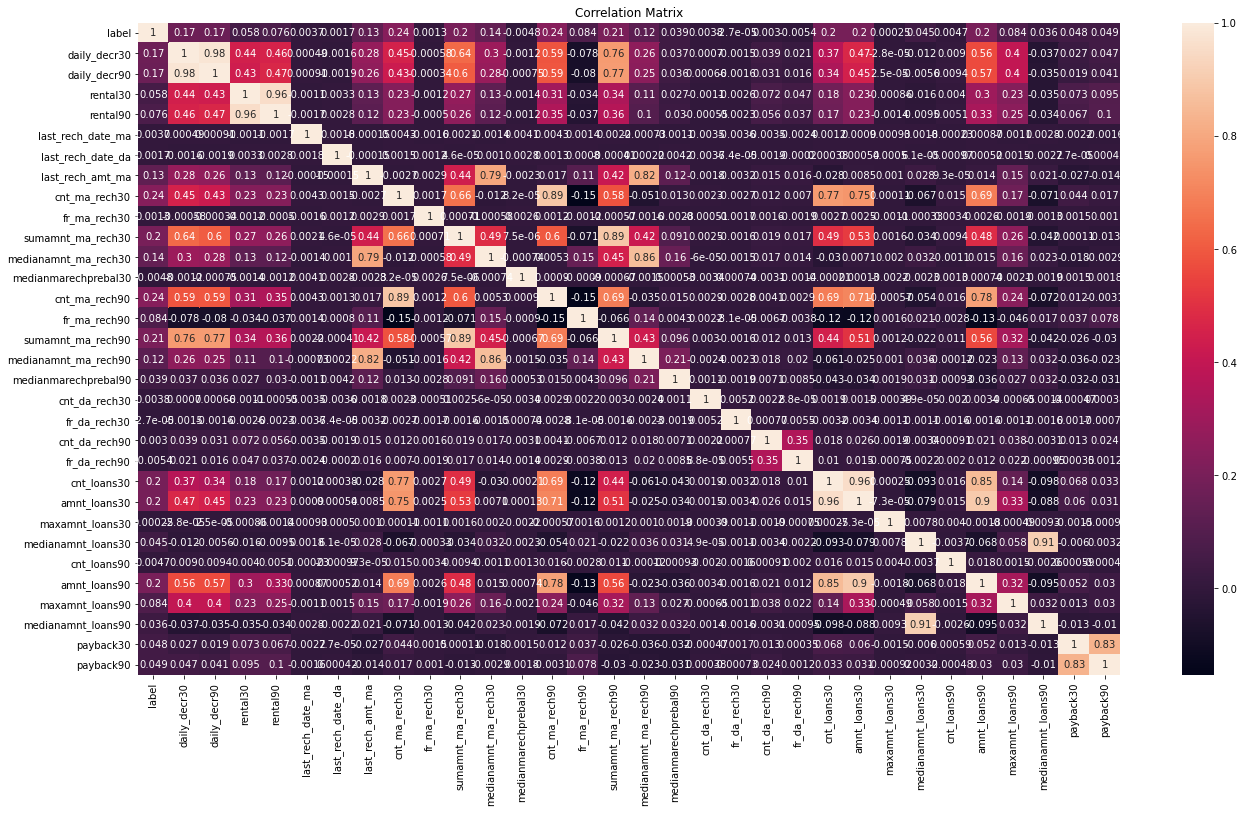

In [25]:
plt.figure(figsize=[22,12])
sns.heatmap(corr_mat,annot=True)
plt.title("Correlation Matrix")
plt.show()

In [26]:
corr_matrix = df1.corr()

corr_matrix['label'].sort_values(ascending=False)

label                   1.000000
cnt_ma_rech30           0.237331
cnt_ma_rech90           0.236392
sumamnt_ma_rech90       0.205793
sumamnt_ma_rech30       0.202828
amnt_loans90            0.199788
amnt_loans30            0.197272
cnt_loans30             0.196283
daily_decr30            0.168298
daily_decr90            0.166150
medianamnt_ma_rech30    0.141490
last_rech_amt_ma        0.131804
medianamnt_ma_rech90    0.120855
fr_ma_rech90            0.084385
maxamnt_loans90         0.084144
rental90                0.075521
rental30                0.058085
payback90               0.049183
payback30               0.048336
medianamnt_loans30      0.044589
medianmarechprebal90    0.039300
medianamnt_loans90      0.035747
cnt_loans90             0.004733
cnt_da_rech30           0.003827
last_rech_date_ma       0.003728
cnt_da_rech90           0.002999
last_rech_date_da       0.001711
fr_ma_rech30            0.001330
maxamnt_loans30         0.000248
fr_da_rech30           -0.000027
medianmare

### multiple column has very less correlation with dependent variable(column label)

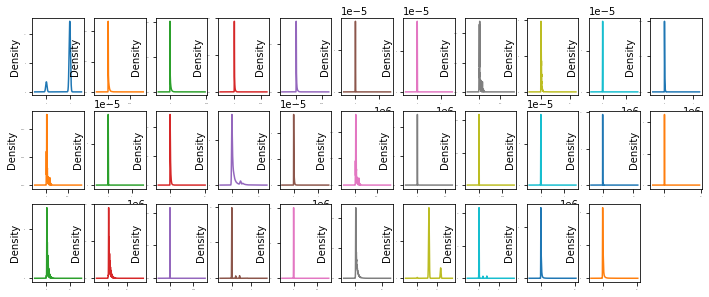

In [27]:
#this is example of multiverient analysis 
df1.plot(kind = 'density', subplots = True, layout=(6,11), sharex=False, legend=False, fontsize = 1, figsize=[12,10])

plt.show()

In [ ]:
#sns.pairplot(df1, hue='label')
#plt.show()

##### Data is highly skewed.

<function matplotlib.pyplot.show(close=None, block=None)>

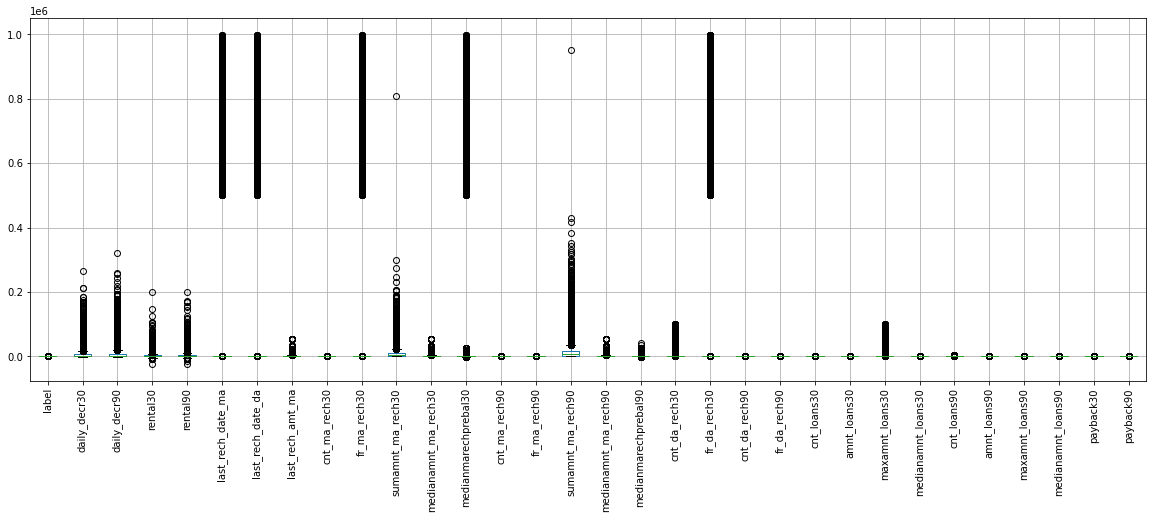

In [28]:
df1.boxplot(figsize=[20,8])
plt.xticks(rotation = 90)
plt.subplots_adjust(bottom=0.25)
plt.show

##### Multiple columns having outliers exist in this data set.

In [29]:
from scipy.stats import zscore
zscr = np.abs(zscore(df1))
threshold = 3.0
print(np.where(zscr>=3.0))

(array([    21,     22,     22, ..., 209586, 209587, 209587], dtype=int64), array([14, 14, 31, ..., 27, 25, 29], dtype=int64))


In [30]:
#lets Print Outliers
print("Shape before removing outliers:",df1.shape)
dsnew = df1[(zscr <3).all(axis=1)]
print("Shape after removing outliers:" ,dsnew.shape)

Shape before removing outliers: (209593, 32)
Shape after removing outliers: (163063, 32)


<function matplotlib.pyplot.show(close=None, block=None)>

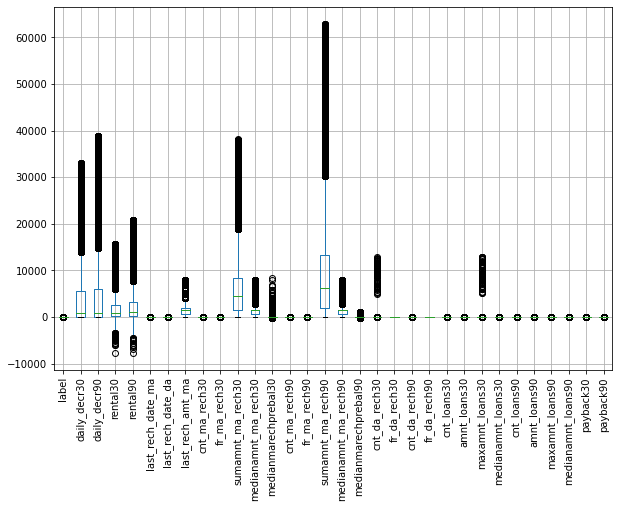

In [31]:
#First 10 columns box plot
dsnew.boxplot(figsize=[10,8])
plt.xticks(rotation = 90)
plt.subplots_adjust(bottom=0.25)
plt.show

In [32]:
#split independent and target variable in x and y dataset.
x = dsnew.drop('label', axis=1)
y = dsnew['label']


In [33]:
x.shape

(163063, 31)

In [34]:
y.shape

(163063,)

In [35]:
x.skew()

daily_decr30             1.963933
daily_decr90             2.078185
rental30                 2.196663
rental90                 2.246622
last_rech_date_ma        3.103877
last_rech_date_da       10.403887
last_rech_amt_ma         2.125988
cnt_ma_rech30            1.175865
fr_ma_rech30             2.004814
sumamnt_ma_rech30        1.634192
medianamnt_ma_rech30     2.326728
medianmarechprebal30    10.500496
cnt_ma_rech90            1.321559
fr_ma_rech90             1.983838
sumamnt_ma_rech90        1.707738
medianamnt_ma_rech90     2.373562
medianmarechprebal90     3.695606
cnt_da_rech30           51.011843
fr_da_rech30             0.000000
cnt_da_rech90            6.941604
fr_da_rech90             0.000000
cnt_loans30              1.466140
amnt_loans30             1.441626
maxamnt_loans30         53.734717
medianamnt_loans30       5.347700
cnt_loans90              1.709511
amnt_loans90             1.695240
maxamnt_loans90          2.682372
medianamnt_loans90       6.098321
payback30     

<function matplotlib.pyplot.show(close=None, block=None)>

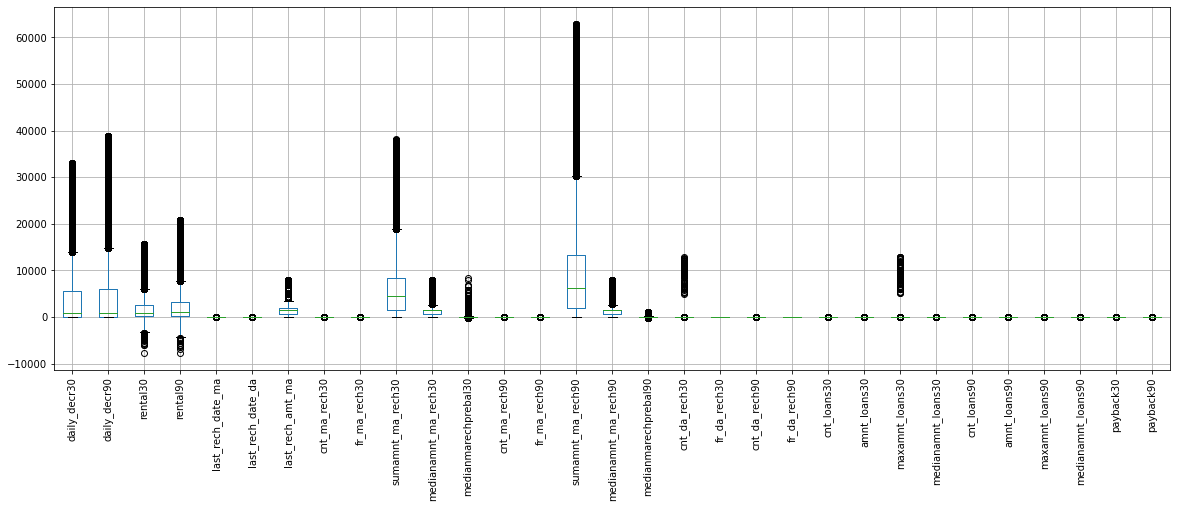

In [36]:
x.boxplot(figsize=[20,8])
plt.xticks(rotation = 90)
plt.subplots_adjust(bottom=0.25)
plt.show

In [37]:
x.skew()

daily_decr30             1.963933
daily_decr90             2.078185
rental30                 2.196663
rental90                 2.246622
last_rech_date_ma        3.103877
last_rech_date_da       10.403887
last_rech_amt_ma         2.125988
cnt_ma_rech30            1.175865
fr_ma_rech30             2.004814
sumamnt_ma_rech30        1.634192
medianamnt_ma_rech30     2.326728
medianmarechprebal30    10.500496
cnt_ma_rech90            1.321559
fr_ma_rech90             1.983838
sumamnt_ma_rech90        1.707738
medianamnt_ma_rech90     2.373562
medianmarechprebal90     3.695606
cnt_da_rech30           51.011843
fr_da_rech30             0.000000
cnt_da_rech90            6.941604
fr_da_rech90             0.000000
cnt_loans30              1.466140
amnt_loans30             1.441626
maxamnt_loans30         53.734717
medianamnt_loans30       5.347700
cnt_loans90              1.709511
amnt_loans90             1.695240
maxamnt_loans90          2.682372
medianamnt_loans90       6.098321
payback30     

In [38]:
from sklearn.linear_model import LogisticRegression
maxAccu = 0
maxRS = 0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.50,random_state=i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    predrf = LR.predict(x_test)
    acc = accuracy_score(y_test,predrf)
    if acc >maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is", maxAccu, "on Random_state",maxRS)

Best accuracy is 0.8660280626011873 on Random_state 127


In [39]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.50,random_state=123)

In [40]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(x_train,y_train)
predlr = LR.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))   
print(classification_report(y_test,predlr))

0.864543982730707
[[  666 10602]
 [  442 69822]]
              precision    recall  f1-score   support

           0       0.60      0.06      0.11     11268
           1       0.87      0.99      0.93     70264

    accuracy                           0.86     81532
   macro avg       0.73      0.53      0.52     81532
weighted avg       0.83      0.86      0.81     81532



In [41]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt = dt.predict(x_test)
print(accuracy_score(y_test,preddt))
print(confusion_matrix(y_test,preddt))   
print(classification_report(y_test,preddt))

0.8598096452926458
[[ 6001  5267]
 [ 6163 64101]]
              precision    recall  f1-score   support

           0       0.49      0.53      0.51     11268
           1       0.92      0.91      0.92     70264

    accuracy                           0.86     81532
   macro avg       0.71      0.72      0.72     81532
weighted avg       0.86      0.86      0.86     81532



In [42]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
predrf = dt.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))   
print(classification_report(y_test,predrf))

0.8598096452926458
[[ 6001  5267]
 [ 6163 64101]]
              precision    recall  f1-score   support

           0       0.49      0.53      0.51     11268
           1       0.92      0.91      0.92     70264

    accuracy                           0.86     81532
   macro avg       0.71      0.72      0.72     81532
weighted avg       0.86      0.86      0.86     81532



In [43]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10, random_state=42)
rf.fit(x_train,y_train)
predrf = dt.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))   
print(classification_report(y_test,predrf))

0.8598096452926458
[[ 6001  5267]
 [ 6163 64101]]
              precision    recall  f1-score   support

           0       0.49      0.53      0.51     11268
           1       0.92      0.91      0.92     70264

    accuracy                           0.86     81532
   macro avg       0.71      0.72      0.72     81532
weighted avg       0.86      0.86      0.86     81532



In [44]:
gnb = GaussianNB()
gnb.fit(x_train,y_train)
pred = gnb.predict(x_test)
print("accuracy_score:",)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy_score:
0.6487514104891331
[[ 9455  1813]
 [26825 43439]]
              precision    recall  f1-score   support

           0       0.26      0.84      0.40     11268
           1       0.96      0.62      0.75     70264

    accuracy                           0.65     81532
   macro avg       0.61      0.73      0.57     81532
weighted avg       0.86      0.65      0.70     81532



In [45]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
predknn = knn.predict(x_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

0.8866947946818428
[[ 5024  6244]
 [ 2994 67270]]
              precision    recall  f1-score   support

           0       0.63      0.45      0.52     11268
           1       0.92      0.96      0.94     70264

    accuracy                           0.89     81532
   macro avg       0.77      0.70      0.73     81532
weighted avg       0.88      0.89      0.88     81532



In [67]:
from sklearn.svm import SVC
sv = SVC(kernel='poly')
sv.fit(x_train,y_train)
predsv = sv.predict(x_test)
print(accuracy_score(y_test,predsv))
print(confusion_matrix(y_test,predsv))   
print(classification_report(y_test,predsv))

0.864142766614199
[[    0  6646]
 [    0 42273]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      6646
           1       0.86      1.00      0.93     42273

    accuracy                           0.86     48919
   macro avg       0.43      0.50      0.46     48919
weighted avg       0.75      0.86      0.80     48919



In [68]:
from sklearn.svm import SVC
sv = SVC(kernel='rbf')
sv.fit(x_train,y_train)
predsv = sv.predict(x_test)
print(accuracy_score(y_test,predsv))
print(confusion_matrix(y_test,predsv))   
print(classification_report(y_test,predsv))

0.8659212167051656
[[  193  6453]
 [  106 42167]]
              precision    recall  f1-score   support

           0       0.65      0.03      0.06      6646
           1       0.87      1.00      0.93     42273

    accuracy                           0.87     48919
   macro avg       0.76      0.51      0.49     48919
weighted avg       0.84      0.87      0.81     48919



In [51]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
ad= AdaBoostClassifier( base_estimator=dt,algorithm='SAMME.R')
ad.fit(x_train,y_train)
predad = ad.predict(x_test)
print(accuracy_score(y_test,predad))
print(confusion_matrix(y_test,predad))
print(classification_report(y_test,predad))

0.901057253593681
[[ 5443  5825]
 [ 2242 68022]]
              precision    recall  f1-score   support

           0       0.71      0.48      0.57     11268
           1       0.92      0.97      0.94     70264

    accuracy                           0.90     81532
   macro avg       0.81      0.73      0.76     81532
weighted avg       0.89      0.90      0.89     81532



In [69]:
from sklearn.model_selection import cross_val_score
scr = cross_val_score(LR,x,y,cv=5)   #cv for 5 split 
print("Corss validation scre for LOgistic regression", scr.mean())

Corss validation scre for LOgistic regression 0.864015756306365


In [52]:
from sklearn.model_selection import cross_val_score
scr = cross_val_score(dt,x,y,cv=5)   #cv for 5 split 
print("Corss validation scre for Decision Tree", scr.mean())

Corss validation scre for Decision Tree 0.8607593397001085


In [53]:
from sklearn.model_selection import cross_val_score
scr = cross_val_score(rf,x,y,cv=5)   #cv for 5 split 
print("Corss validation scre for Random Forest", scr.mean())

Corss validation scre for Random Forest 0.8997626800526733


In [54]:
from sklearn.model_selection import cross_val_score
scr = cross_val_score(ad,x,y,cv=5)   #cv for 5 split 
print("Corss validation scre for Adaboost regression", scr.mean())

Corss validation scre for Adaboost regression 0.8986158738367521


In [55]:
from sklearn.model_selection import cross_val_score
scr = cross_val_score(knn,x,y,cv=5)   #cv for 5 split 
print("Corss validation scre for Knearest Neigbour Classification", scr.mean())

Corss validation scre for Knearest Neigbour Classification 0.8890980753597069


In [ ]:
#from sklearn.model_selection import cross_val_score
#scr = cross_val_score(sv,x,y,cv=5)   #cv for 5 split 
#print("Corss validation scre for support vector", scr.mean())

In [88]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

y_pred_prob=knn.predict_proba(x_test)[:,1]
y_pred_prob

array([0. , 0.8, 1. , ..., 0.6, 0.6, 1. ])

In [89]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

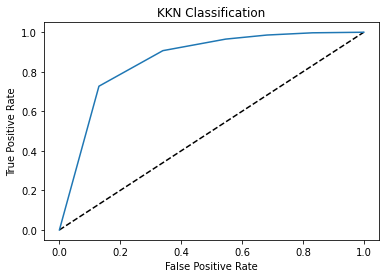

In [91]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label="KKN")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("KKN Classification")
plt.show()

#### Obsarvation:-
Model learning for KNN classification is good, as area under the curve covers maximum space

In [62]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV

In [67]:
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
#clf=GridSearchCV(knn,parameters)

In [68]:
GCV =GridSearchCV(knn,param_grid,cv=5)

In [69]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]})

In [ ]:
sorted(clf.cv_results_.keys())


In [70]:
GCV.best_params_   #printing best parameter found by GCV

{'n_neighbors': 17}

In [71]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=17)
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
predknn = knn.predict(x_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))


0.8912696855222489
[[ 4725  6543]
 [ 2322 67942]]
              precision    recall  f1-score   support

           0       0.67      0.42      0.52     11268
           1       0.91      0.97      0.94     70264

    accuracy                           0.89     81532
   macro avg       0.79      0.69      0.73     81532
weighted avg       0.88      0.89      0.88     81532

